In [1]:
import pandas as pd
import re

%matplotlib inline

## Get all the proposals and their themes 

In [3]:
proposals = pd.read_pickle('proposals.pkl')
themes = pd.read_pickle('themes.pkl')

## Who are the recipients?

In [17]:
pd.crosstab(
    proposals['created_at'].dt.year,
    proposals.recipient_category,
    dropna=False,
)

recipient_category,A community or voluntary group,An unincorporated association,An unregistered charity,A charitable organisation,A company,An industrial and provident society (IPS),An individual,Another type of organisation
created_at,,,,,,,,
2015,0,1,0,2,0,0,0,42
2016,0,1398,0,1838,636,0,0,528
2017,0,2413,0,3274,1317,0,0,3210
2018,78,826,20,3665,945,0,51,588
2019,320,35,54,1051,192,5,211,114
2020,48,13,20,355,41,3,27,23


In [27]:
agg = pd.crosstab(
    proposals['created_at'].dt.year,
    proposals.recipient_income_band,
    dropna=False,
)
proposals.loc[
    proposals.recipient_income_band.isnull(),
    'created_at'
].dt.year.value_counts()
agg

recipient_income_band,Less than £10k,£10k - £99k,£100k - £999k,£1m - £10m,More than £10m
created_at,,,,,
2015,1,1,0,0,1
2016,1684,1057,749,350,130
2017,2572,1619,1272,567,190
2018,1747,1708,1459,740,305
2019,592,633,402,126,19
2020,152,171,131,37,12


In [28]:
pd.crosstab(
    proposals['created_at'].dt.year,
    proposals.recipient_operating_for,
    dropna=False,
)

recipient_operating_for,Yet to start,Less than 12 months,Less than 3 years,4 years or more
created_at,,,,
2015,0,1,1,1
2016,553,679,591,2308
2017,969,1139,939,3878
2018,509,778,727,3965
2019,146,253,269,1104
2020,39,70,70,324


In [30]:
pd.crosstab(
    proposals['created_at'].dt.year,
    proposals['geographic_scale'],
    dropna=False,
)

geographic_scale,international,local,missing,national,regional
created_at,,,,,
2015,3,27,0,14,1
2016,381,1933,0,817,1269
2017,723,3333,4300,808,1061
2018,516,3676,461,676,845
2019,82,1392,0,212,296
2020,34,359,0,61,76


In [31]:
pd.crosstab(
    proposals['created_at'].dt.year,
    proposals['category'],
    dropna=False,
)

category,Capital,Revenue - Core,Revenue - Project,Other
created_at,,,,
2015,0,0,3,42
2016,1108,0,2373,919
2017,1709,0,3441,5075
2018,1740,74,3408,952
2019,605,436,822,119
2020,160,149,203,18


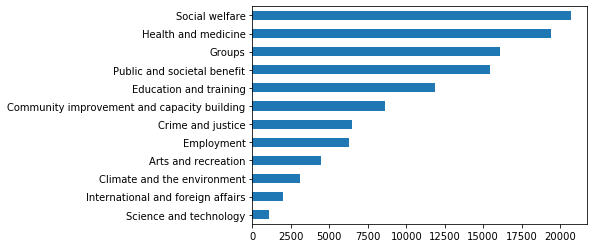

In [105]:
proposal_themes['parent_name'].value_counts()[::-1].plot.barh()

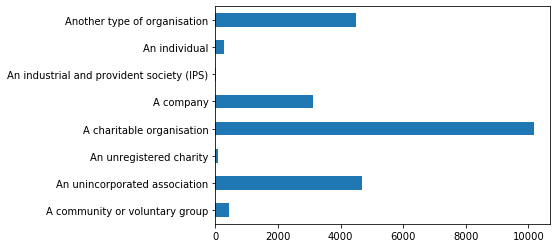

In [107]:
proposals.recipient_category.value_counts().sort_index().plot.barh()

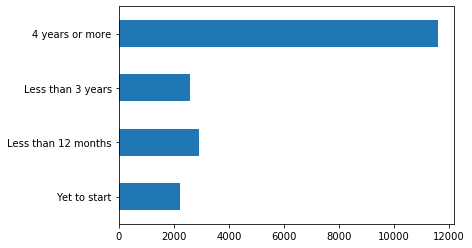

In [108]:
proposals.recipient_operating_for.value_counts().sort_index().plot.barh()

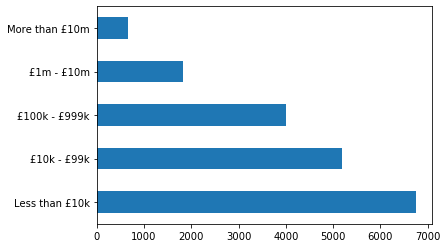

In [109]:
proposals.recipient_income_band.value_counts().sort_index().plot.barh()

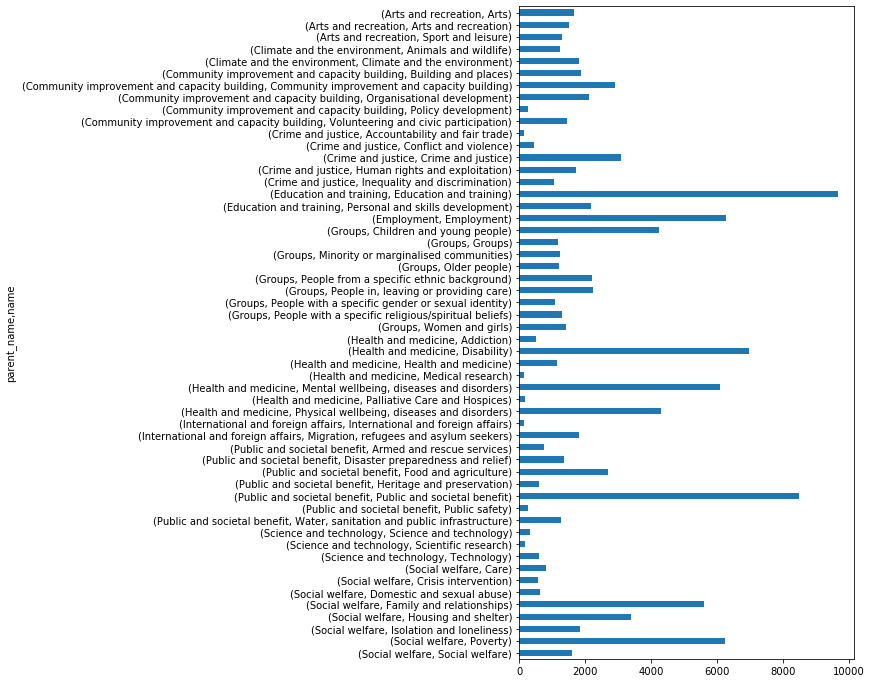

In [53]:
proposal_themes.groupby(['parent_name', 'name']).size()[::-1].plot.barh(figsize=(6,12))

In [32]:
proposals[['min_duration', 'max_duration']].describe().astype(int)

,min_duration,max_duration
count,18388,18388
mean,18,20
std,334,334
min,-24,1
25%,12,12
50%,12,12
75%,18,24
max,45000,45000


In [34]:
proposals[['min_amount', 'max_amount']].describe().astype(int)

,min_amount,max_amount
count,18685,18685
mean,332347,346259
std,15648934,15650587
min,0,0
25%,5000,5000
50%,15000,20000
75%,50000,50000
max,2000000000,2000000000


In [40]:
pd.crosstab(
    proposals['created_at'].dt.year,
    pd.cut(proposals['min_amount'], bins=AMOUNT_BINS, labels=AMOUNT_BIN_LABELS),
    dropna=False,
)

min_amount,Under £500,£500 - £1k,£1k - £2k,£2k - £5k,£5k - £10k,£10k - £100k,£100k - £1m,Over £1m
created_at,,,,,,,,
2015,1,3,3,3,7,21,7,0
2016,311,164,209,670,662,1841,479,59
2017,402,234,255,791,927,2499,692,112
2018,260,245,212,834,1115,2569,631,59
2019,230,233,103,356,345,484,108,13
2020,66,66,25,101,85,142,27,3


In [43]:
pd.crosstab(
    proposals['created_at'].dt.year,
    pd.cut(proposals['min_duration'], bins=DURATION_BINS, labels=DURATION_BIN_LABELS),
    dropna=False,
)

min_duration,Under 12 months,12 months,18 months,2 years,3 years,4 years +
created_at,,,,,,
2015,13,18,2,4,4,4
2016,696,2466,70,616,425,127
2017,877,3310,113,843,592,188
2018,1122,3030,110,717,522,132
2019,800,721,35,147,117,50
2020,226,209,3,38,28,12


In [59]:
proposals['geographic_scale'].value_counts()

local            10720
missing           4762
regional          3548
national          2588
international     1739
Name: geographic_scale, dtype: int64

In [70]:
proposals['category'].value_counts()

Revenue - Project    10250
Other                 7126
Capital               5322
Revenue - Core         659
Name: category, dtype: int64

In [35]:
proposals[['created_at']].describe()

,created_at
count,23357
unique,23357
top,2017-08-07 12:00:00.796195
freq,1
first,2015-12-14 17:06:33.599433
last,2020-06-24 13:51:20.310133


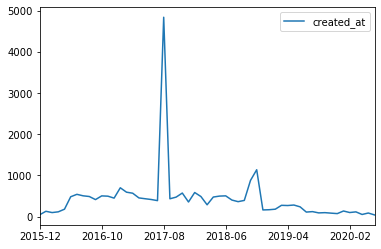

In [41]:
proposals['created_at'].dt.strftime("%Y-%m").value_counts().sort_index().to_frame().plot()

In [33]:
proposals.columns

Index(['recipient_id', 'title', 'description', 'min_duration', 'min_amount',
       'created_at', 'updated_at', 'state', 'prevent_funder_verification',
       'category_code', 'public_consent', 'support_details', 'max_amount',
       'max_duration', 'geographic_scale', 'user_id', 'access_token',
       'private', 'collection_id', 'collection_type', 'duplicate_of',
       'migrated_on', 'assessments_count'],
      dtype='object')

In [11]:
text = proposals[
    ['title', 'description']
].fillna("")\
    .apply(" ".join, axis=1)\
    .str.lower()\
    .map(lambda x: re.sub(' +', ' ', re.sub('[^ a-z0-9]', ' ', x)))

In [12]:
text

id
37737    increasing the provision of sheltered homes fo...
37755    bme community sports looking to get more bme c...
37776    buying basic equiment we need to buy basic equ...
37792    buying basic equipment we need to buy scissors...
37793    using drone technology i am looking to provide...
                               ...                        
37732    new secure for mower storage currently our mow...
37733    safetotalk using ai to assess the mental wellb...
37734    strengthening cohesion and integration sector ...
37735    cancer support centre we aim to relieve the ph...
37736    community support project supported hospital d...
Length: 23356, dtype: object

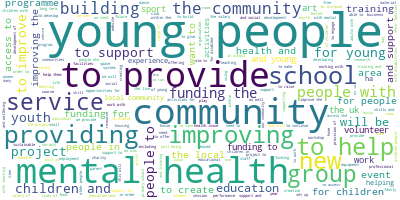

In [13]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(text.values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

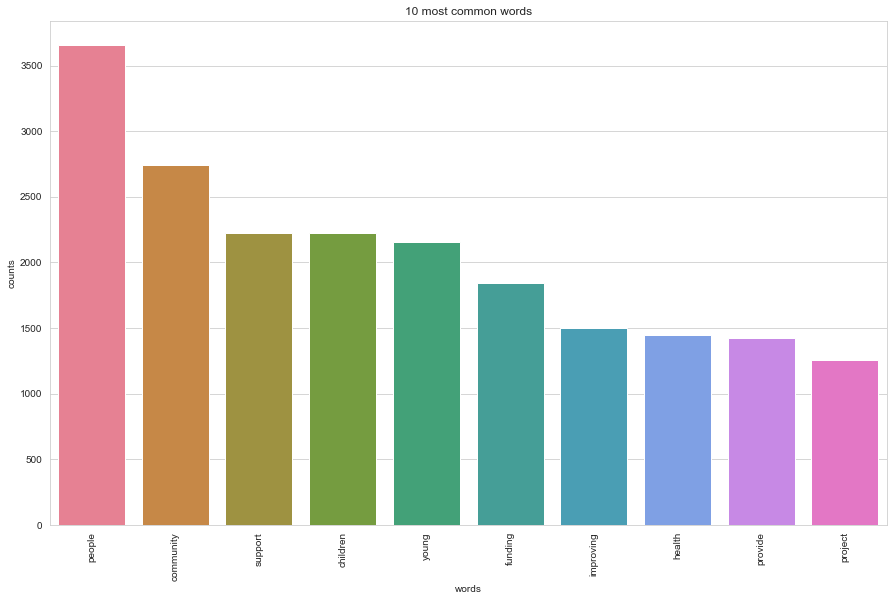

In [14]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(text)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [40]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 15
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

# save the model to disk
with open('./lda_model_'+str(number_topics)+'.pkl', 'wb') as f:
    pickle.dump(lda, f)

Topics found via LDA:

Topic #0:
water clean provide community history local programme support test volunteers

Topic #1:
health people support mental young women provide training improving children

Topic #2:
women funding service purchase help centre deaf new art day

Topic #3:
support work funding families education refugees children people salary asylum

Topic #4:
people help support education volunteers advice training funding disabled communities

Topic #5:
business community capacity building sustainable development project funding create social

Topic #6:
care music people provide young children support carers cancer dementia

Topic #7:
community new building centre hall local village project park area

Topic #8:
food school funding children local schools community provide poverty year

Topic #9:
new equipment website funding students need community help looking improve

Topic #10:
community arts local people young workshops communities creative art groups

Topic #11:
children 

In [41]:
%%time
import os
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics)+'.pkl')

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

Wall time: 5min 18s


C:\Users\drkan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [26]:
lda.components_

array([[ 0.05      ,  7.6137038 ,  0.05      , ...,  0.05      ,
         0.05      ,  3.04999999],
       [ 3.95281931, 18.80545393,  0.05      , ...,  0.05      ,
         0.05      ,  0.05      ],
       [ 0.05      ,  3.25270945,  0.05      , ...,  0.05      ,
         0.05      ,  0.05      ],
       ...,
       [ 0.05      , 11.36607103,  0.05      , ...,  0.05      ,
         0.05      ,  0.05      ],
       [ 0.05      , 10.00925304,  0.05      , ...,  0.05      ,
         0.05      ,  0.05      ],
       [ 0.05      ,  0.05      ,  0.05      , ...,  0.05      ,
         0.05      ,  0.05      ]])

In [24]:
count_data

<23356x15795 sparse matrix of type '<class 'numpy.int64'>'
	with 178953 stored elements in Compressed Sparse Row format>

In [42]:
lda_topics = lda.transform(count_data)
print(len(lda_topics))
print(len(lda_topics[0]))

23356
15


In [43]:
pd.DataFrame(lda_topics).idxmax(axis=1)

0        11
1         7
2         6
3         6
4         9
         ..
23351     2
23352     1
23353     4
23354     1
23355     6
Length: 23356, dtype: int64

In [36]:
text.iloc[23355]

'community support project supported hospital discharge through the use of volunteers'

In [37]:
count_data[23355]

<1x15795 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>